# Installing libraries

In [1]:
!pip install aif360
!pip install fairlearn
!pip install BlackBoxAuditing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 34.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for BlackBoxAuditing: filename=BlackBoxAuditing-0.1.54-py2.py3-none-any.whl size=1394756 sha256=758323abacfbcfd3b5cff4f6c76ce53b1da43ace56b350d84b750dd744c16d7b
  Stored in directory: /root/.cache/pip/wheels/c0/4f/b1/80e1b0790df07536470758fe0a4f9ff8fa942fd9fe30bbb192
Successfully built BlackBoxAuditing


In [2]:
%matplotlib inline

# Pre-processing steps

In [3]:
import pandas as pd
import numpy as np
data = pd.read_csv('/kaggle/input/case-combined/merged_subjects_data.csv')
data

,time,valence,arousal,video_x,Emotion,ecg,bvp,gsr,rsp,skt,emg_zygo,emg_coru,emg_trap,video_y,SUBJECT,AGE,GENDER,EMOTION,video_name,vid_emotion
0,1061504,-1276.0,6252.0,8.0,Frustrated or Impatient,0.76062,35.053549,4.384464,27.174558,28.863552,7.86300,6.13825,5.31675,8.0,1,30-34,F,scary,Mama (2008),scary-2
1,1061554,-1276.0,6252.0,8.0,Frustrated or Impatient,0.79018,35.005141,4.360800,27.193884,28.849530,7.94525,5.76850,5.15250,8.0,1,30-34,F,scary,Mama (2008),scary-2
2,1061604,-1276.0,6268.0,8.0,Frustrated or Impatient,0.80990,35.809029,4.380504,27.213270,28.860030,8.06850,5.72750,5.02950,8.0,1,30-34,F,scary,Mama (2008),scary-2
3,1061654,-1276.0,6268.0,8.0,Frustrated or Impatient,0.83946,37.368456,4.384464,27.281031,28.863552,7.37025,6.09725,5.31675,8.0,1,30-34,F,scary,Mama (2008),scary-2
4,1061704,-1276.0,6288.0,8.0,Frustrated or Impatient,0.79018,37.145698,4.356864,27.271309,28.863552,7.65775,5.89175,5.11150,8.0,1,30-34,F,scary,Mama (2008),scary-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196278,2231442,0.0,0.0,7.0,Neutral,1.05632,37.949645,37.403472,46.155954,29.852173,5.39900,7.53450,5.89175,7.0,29,25-29,M,scary,Shutter (2004),scary-1
196279,2231492,0.0,0.0,7.0,Neutral,0.81318,37.542807,37.419240,46.223715,29.852173,5.64550,7.98625,5.85075,7.0,29,25-29,M,scary,Shutter (2004),scary-1
196280,2231542,0.0,0.0,7.0,Neutral,0.82632,36.961677,37.320672,46.301140,29.845152,5.56325,7.41125,5.72750,7.0,29,25-29,M,scary,Shutter (2004),scary-1
196281,2231592,0.0,0.0,7.0,Neutral,0.83290,36.516101,37.407408,46.397951,29.862694,5.76850,7.57550,5.80975,12.0,29,25-29,M,scary,Shutter (2004),scary-1


In [4]:
data['Emotion'].unique()

array(['Frustrated or Impatient', 'Tensed or Annoyed',
       'Distressed or Defiant', 'Neutral', 'Confident or Attentive',
       'Passionate or Amused', 'Pleased or Glad', 'Delighted or Happy',
       'Worried or Apathetic', 'Frustrated or Discontented',
       'Aroused or Astonished', 'Miserable or Sad', 'Anxious or Dejected',
       'Tired or Bored', 'Polite or Sleepy', 'Excited or Adventurous'],
      dtype=object)

In [5]:
# Define positive and negative emotions
positive_emotions = [
    'Confident or Attentive', 'Passionate or Amused', 'Pleased or Glad', 
    'Delighted or Happy', 'Excited or Adventurous', 'Polite or Sleepy', 
    'Neutral', 'Aroused or Astonished'
]

# Add a new column 'Emotion_Type' to classify emotions as Positive or Negative
data['Emotion_Type'] = data['Emotion'].apply(
    lambda x: 'Positive' if x in positive_emotions else 'Negative'
)
# Define the columns to retain
columns_to_keep = [
    'ecg', 'bvp', 'gsr', 'rsp', 'skt', 'emg_coru', 'emg_trap', 'emg_zygo',  # 8 physio features
    'Emotion', 'AGE', 'GENDER', 'Emotion_Type'  # Other required columns
]

# Create a new DataFrame retaining only the specified columns
data = data[columns_to_keep]

In [6]:
data

,ecg,bvp,gsr,rsp,skt,emg_coru,emg_trap,emg_zygo,Emotion,AGE,GENDER,Emotion_Type
0,0.76062,35.053549,4.384464,27.174558,28.863552,6.13825,5.31675,7.86300,Frustrated or Impatient,30-34,F,Negative
1,0.79018,35.005141,4.360800,27.193884,28.849530,5.76850,5.15250,7.94525,Frustrated or Impatient,30-34,F,Negative
2,0.80990,35.809029,4.380504,27.213270,28.860030,5.72750,5.02950,8.06850,Frustrated or Impatient,30-34,F,Negative
3,0.83946,37.368456,4.384464,27.281031,28.863552,6.09725,5.31675,7.37025,Frustrated or Impatient,30-34,F,Negative
4,0.79018,37.145698,4.356864,27.271309,28.863552,5.89175,5.11150,7.65775,Frustrated or Impatient,30-34,F,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...
196278,1.05632,37.949645,37.403472,46.155954,29.852173,7.53450,5.89175,5.39900,Neutral,25-29,M,Positive
196279,0.81318,37.542807,37.419240,46.223715,29.852173,7.98625,5.85075,5.64550,Neutral,25-29,M,Positive
196280,0.82632,36.961677,37.320672,46.301140,29.845152,7.41125,5.72750,5.56325,Neutral,25-29,M,Positive
196281,0.83290,36.516101,37.407408,46.397951,29.862694,7.57550,5.80975,5.76850,Neutral,25-29,M,Positive


Gender and Age Distribution (Heatmap Data):
AGE     20-24  25-29  30-34  35-39
GENDER                            
F       47654  32822  13625      0
M       20440  61304   6812  13626
Total Instances: 196283


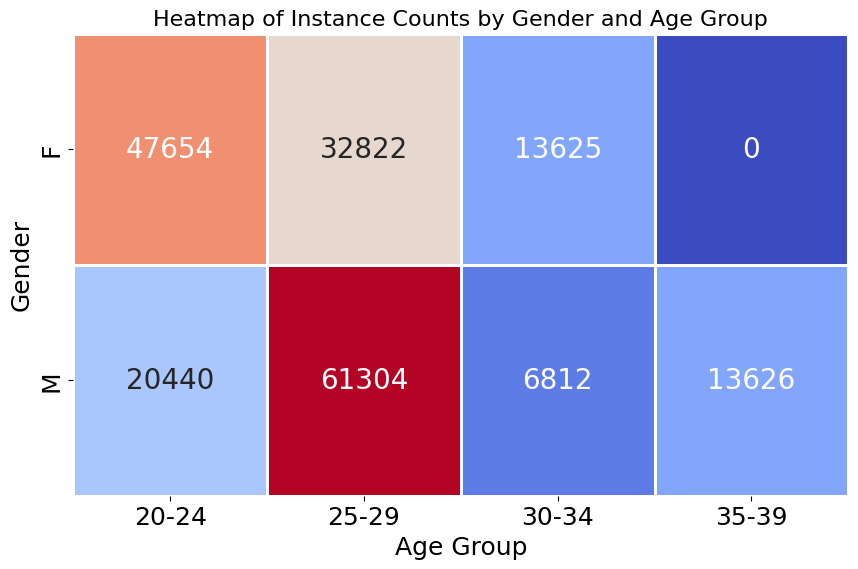


Emotion Type Counts and Percentages:
Emotion
Neutral                       108843
Confident or Attentive         18418
Passionate or Amused           17212
Frustrated or Impatient        16325
Distressed or Defiant          11175
Worried or Apathetic            6601
Tensed or Annoyed               4845
Delighted or Happy              4296
Pleased or Glad                 2963
Frustrated or Discontented      1823
Tired or Bored                  1195
Aroused or Astonished           1152
Polite or Sleepy                 982
Miserable or Sad                 247
Anxious or Dejected              157
Excited or Adventurous            49
Name: count, dtype: int64
Emotion
Neutral                       55.452077
Confident or Attentive         9.383390
Passionate or Amused           8.768971
Frustrated or Impatient        8.317073
Distressed or Defiant          5.693310
Worried or Apathetic           3.363001
Tensed or Annoyed              2.468375
Delighted or Happy             2.188677
Pleased 

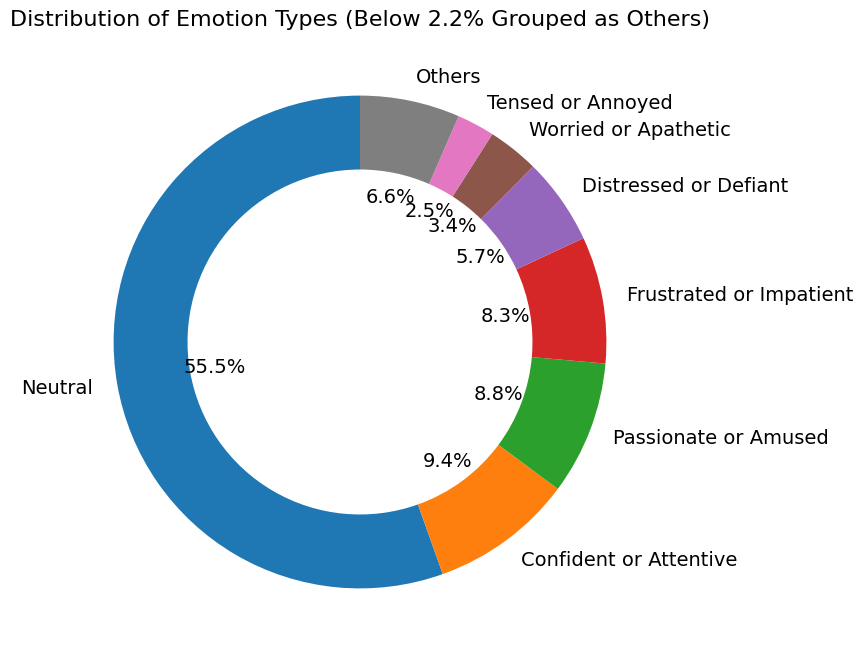


Number of Instances with 'Neutral': 108843

Emotion Type Counts (Excluding Neutral):
Emotion
Confident or Attentive        18418
Passionate or Amused          17212
Frustrated or Impatient       16325
Distressed or Defiant         11175
Worried or Apathetic           6601
Tensed or Annoyed              4845
Delighted or Happy             4296
Pleased or Glad                2963
Frustrated or Discontented     1823
Tired or Bored                 1195
Aroused or Astonished          1152
Polite or Sleepy                982
Miserable or Sad                247
Anxious or Dejected             157
Excited or Adventurous           49
Name: count, dtype: int64
Total Instances (Excluding Neutral): 87440
Emotion Type Percentages (Excluding Neutral):
Emotion
Confident or Attentive        21.063586
Passionate or Amused          19.684355
Frustrated or Impatient       18.669945
Distressed or Defiant         12.780192
Worried or Apathetic           7.549177
Tensed or Annoyed              5.540942
Del

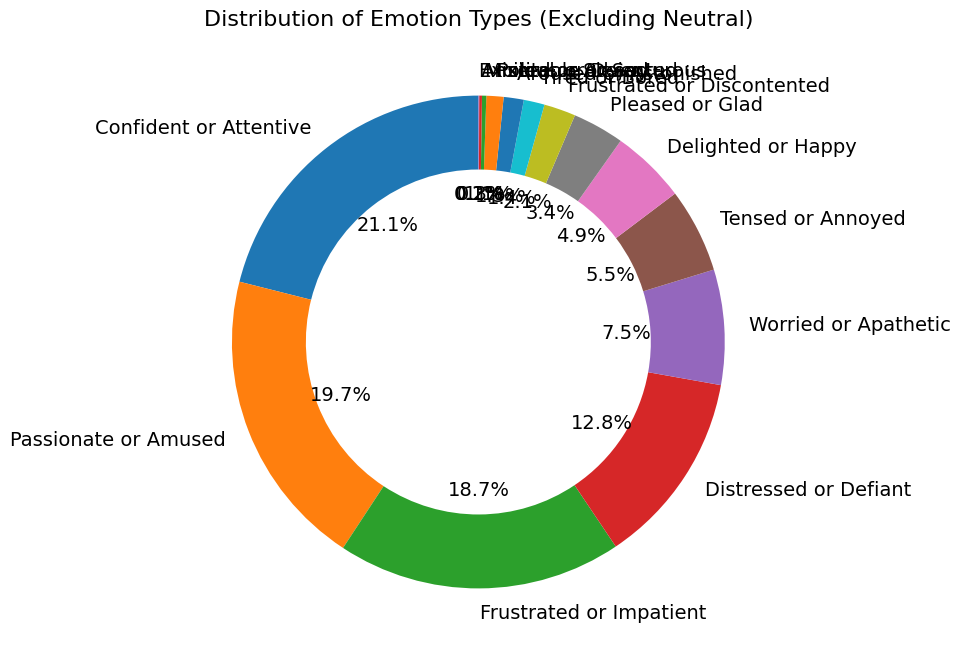


Age Group Distribution:
AGE
25-29    94126
20-24    68094
30-34    20437
35-39    13626
Name: count, dtype: int64
Total Instances in Age Groups: 196283


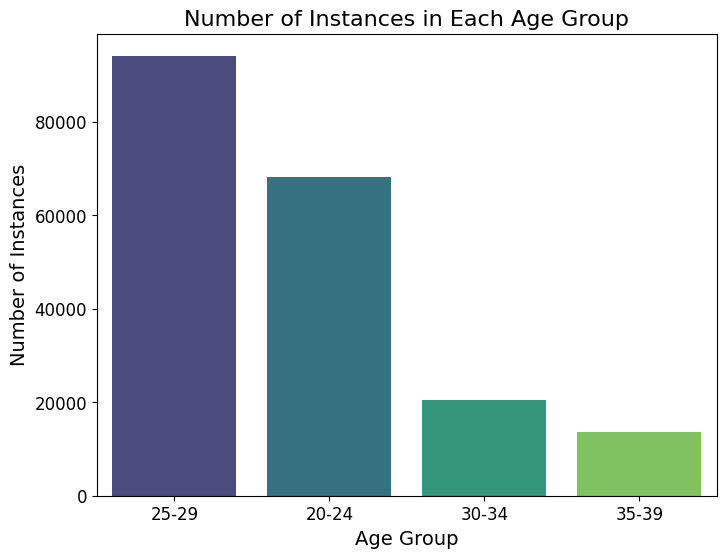


Gender Distribution:
GENDER
M    102182
F     94101
Name: count, dtype: int64
Total Instances in Gender Classes: 196283


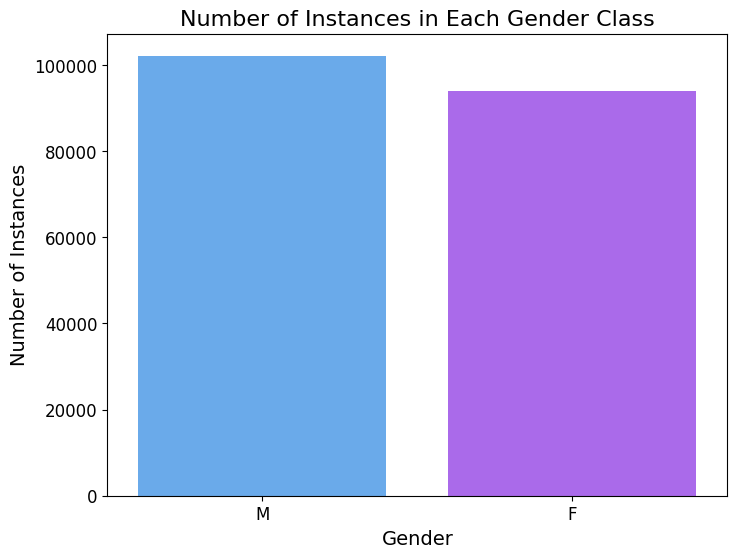

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example DataFrame (replace with your dataset)
# data = pd.read_csv("your_data.csv")

# 1. Heatmap for Gender and Age Distribution
plt.figure(figsize=(10, 6))

# Grouping data by Gender and Age and calculating the count
heatmap_data = data.groupby(['GENDER', 'AGE']).size().unstack(fill_value=0)

# Print the heatmap data and total count
print("Gender and Age Distribution (Heatmap Data):")
print(heatmap_data)
print(f"Total Instances: {heatmap_data.sum().sum()}")  # Total instances in the heatmap data

# Create the heatmap
sns.heatmap(
    heatmap_data, annot=True, cmap='coolwarm', fmt='d', linewidths=1, cbar=False,
    annot_kws={"size": 20}  # Adjust text size
)
plt.title('Heatmap of Instance Counts by Gender and Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=18)
plt.ylabel('Gender', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

# 2. Donut Chart for Emotion_Type Distribution (with threshold)
percentage_threshold = 2.2  # Set the percentage threshold (e.g., 5%)
emotion_type_counts = data['Emotion'].value_counts()

# Calculate percentages
total_count = emotion_type_counts.sum()
emotion_type_percentages = (emotion_type_counts / total_count) * 100

# Print the emotion type counts, percentages, and total instances
print("\nEmotion Type Counts and Percentages:")
print(emotion_type_counts)
print(emotion_type_percentages)
print(f"Total Instances: {total_count}")  # Total instances in emotion type data

# Group smaller categories
emotion_type_counts_filtered = emotion_type_counts[emotion_type_percentages >= percentage_threshold]
others_count = emotion_type_counts[emotion_type_percentages < percentage_threshold].sum()
if others_count > 0:
    emotion_type_counts_filtered["Others"] = others_count

# Plot the initial donut chart
plt.figure(figsize=(8, 8))
plt.pie(
    emotion_type_counts_filtered, labels=emotion_type_counts_filtered.index, autopct='%1.1f%%', 
    startangle=90, textprops={'fontsize': 14}, wedgeprops={'width': 0.3}
)
plt.title(f'Distribution of Emotion Types (Below {percentage_threshold}% Grouped as Others)', fontsize=16)
plt.show()

# 3. Remove 'Neutral' instances and plot donut chart again
# Print the count of 'Neutral' instances before excluding
neutral_count = data[data['Emotion'] == 'Neutral'].shape[0]
print(f"\nNumber of Instances with 'Neutral': {neutral_count}")

# Remove 'Neutral' instances
data_no_neutral = data[data['Emotion'] != 'Neutral']

# Recalculate emotion type counts and percentages for non-neutral instances
emotion_type_counts_no_neutral = data_no_neutral['Emotion'].value_counts()

# Print the filtered emotion type counts and total instances
print("\nEmotion Type Counts (Excluding Neutral):")
print(emotion_type_counts_no_neutral)
print(f"Total Instances (Excluding Neutral): {emotion_type_counts_no_neutral.sum()}")  # Total instances excluding 'Neutral'

# Calculate percentages for non-neutral instances
emotion_type_percentages_no_neutral = (emotion_type_counts_no_neutral / emotion_type_counts_no_neutral.sum()) * 100
print("Emotion Type Percentages (Excluding Neutral):")
print(emotion_type_percentages_no_neutral)

# Plot the donut chart again without Neutral instances
plt.figure(figsize=(8, 8))
plt.pie(
    emotion_type_counts_no_neutral, labels=emotion_type_counts_no_neutral.index, autopct='%1.1f%%', 
    startangle=90, textprops={'fontsize': 14}, wedgeprops={'width': 0.3}
)
plt.title('Distribution of Emotion Types (Excluding Neutral)', fontsize=16)
plt.show()

# 4. Bar Plot for Age Group Distribution
plt.figure(figsize=(8, 6))

# Count the instances for each age group
age_counts = data['AGE'].value_counts()

# Print the age group distribution and total instances
print("\nAge Group Distribution:")
print(age_counts)
print(f"Total Instances in Age Groups: {age_counts.sum()}")  # Total instances in age groups

# Create the bar plot
sns.barplot(
    x=age_counts.index,
    y=age_counts.values,
    palette='viridis'
)
plt.title('Number of Instances in Each Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Number of Instances', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# 5. Bar Plot for Gender Distribution
plt.figure(figsize=(8, 6))

# Count the instances for each gender
gender_counts = data['GENDER'].value_counts()

# Print the gender distribution and total instances
print("\nGender Distribution:")
print(gender_counts)
print(f"Total Instances in Gender Classes: {gender_counts.sum()}")  # Total instances in gender classes

# Create the bar plot
sns.barplot(
    x=gender_counts.index,
    y=gender_counts.values,
    palette='cool'
)
plt.title('Number of Instances in Each Gender Class', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number of Instances', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


Missing values before cleaning:
ecg             1
bvp             1
gsr             1
rsp             1
skt             1
emg_coru        1
emg_trap        1
emg_zygo        1
Emotion         0
AGE             0
GENDER          0
Emotion_Type    0
dtype: int64

Missing values after cleaning:
ecg             1
bvp             1
gsr             1
rsp             1
skt             1
emg_coru        1
emg_trap        1
emg_zygo        1
Emotion         0
AGE             0
GENDER          0
Emotion_Type    0
dtype: int64
Target size per class: 2963

Old Emotion Class Distribution:
Emotion
Confident or Attentive        18418
Passionate or Amused          17212
Frustrated or Impatient       16325
Distressed or Defiant         11175
Worried or Apathetic           6601
Tensed or Annoyed              4845
Delighted or Happy             4296
Pleased or Glad                2963
Frustrated or Discontented     1823
Tired or Bored                 1195
Aroused or Astonished          1152
Polite or Sle

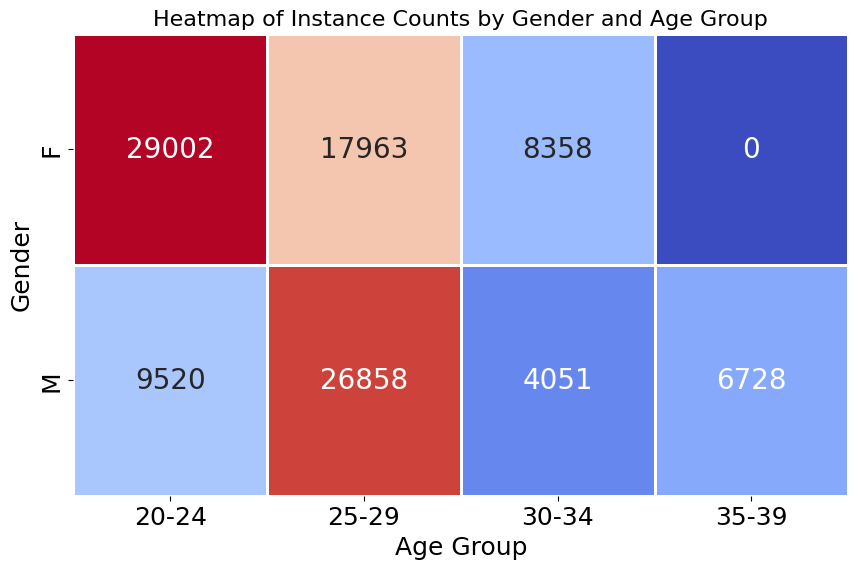


Emotion Distribution Information:
Emotion
Confident or Attentive        18418
Passionate or Amused          17212
Frustrated or Impatient       16325
Distressed or Defiant         11175
Worried or Apathetic           6601
Tensed or Annoyed              4845
Delighted or Happy             4296
Tired or Bored                 3154
Pleased or Glad                2963
Anxious or Dejected            2962
Excited or Adventurous         2959
Aroused or Astonished          2958
Polite or Sleepy               2948
Miserable or Sad               2939
Frustrated or Discontented     2809
Name: count, dtype: int64
Total Instances in Emotion Distribution: 102564
Percentages for each class:
Emotion
Confident or Attentive        17.957568
Passionate or Amused          16.781717
Frustrated or Impatient       15.916891
Distressed or Defiant         10.895636
Worried or Apathetic           6.435981
Tensed or Annoyed              4.723880
Delighted or Happy             4.188604
Tired or Bored             

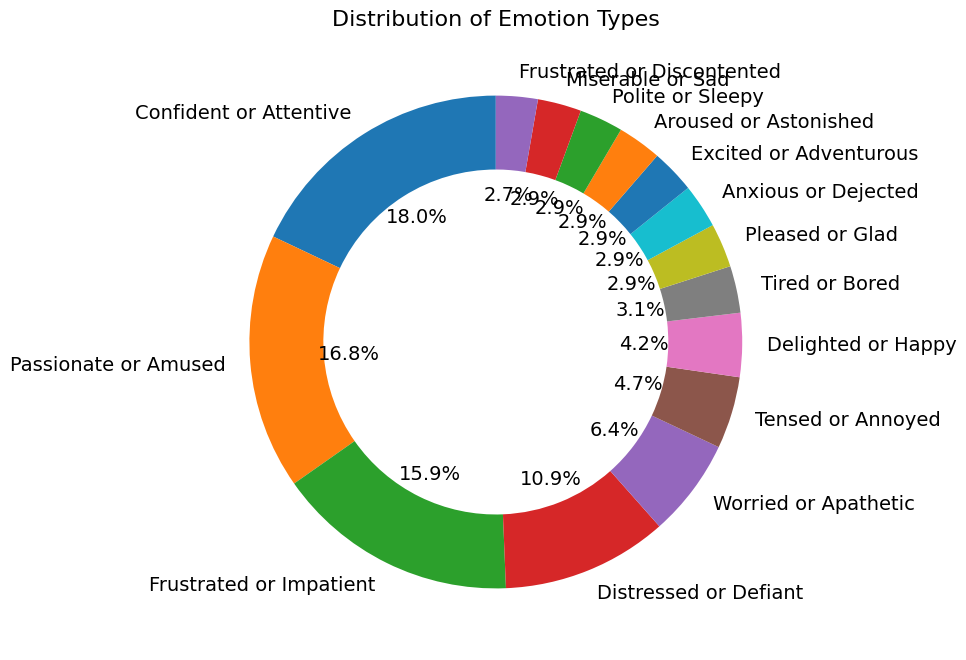


Age Group Distribution Information:
AGE
25-29    44821
20-24    38528
30-34    12409
35-39     6728
Name: count, dtype: int64
Total Instances in Age Group Distribution: 102486


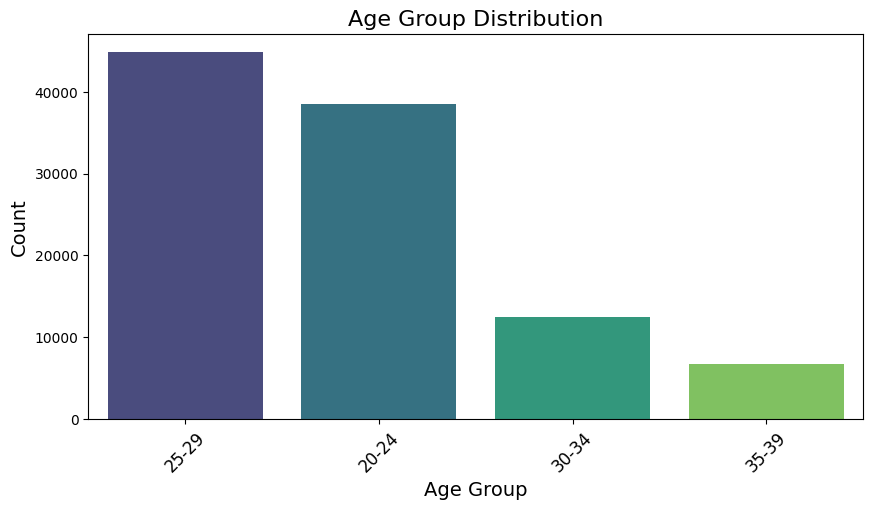

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.impute import SimpleImputer

def clean_data(data):
    """Cleans data by handling missing values in crucial columns."""
    df = data.copy()
    print("Missing values before cleaning:")
    print(df.isnull().sum())
    
    # Drop rows where crucial columns ('Emotion', 'GENDER', 'AGE') have missing values
    crucial_columns = ['Emotion', 'GENDER', 'AGE']
    df = df.dropna(subset=crucial_columns)

    df = df[df['Emotion'] != 'Neutral']
    
    print("\nMissing values after cleaning:")
    print(df.isnull().sum())
    return df

def balance_emotion_data(data):
    """Balances the Emotion data using ADASYN or SMOTE."""
    
    df = data.copy()
    
    # Calculate target size for balanced classes
    emotion_counts = df['Emotion'].value_counts()
    target_size = int(np.median(emotion_counts))  # Use median as target size for balancing
    print(f"Target size per class: {target_size}")
    
    print("\nOld Emotion Class Distribution:")
    print(emotion_counts)
    print(f"Total Instances before balancing: {emotion_counts.sum()}")
    
    X = df.drop(['Emotion', 'Emotion_Type'], axis=1)
    y = df['Emotion']
    
    # Convert categorical variables to numeric codes
    X['GENDER'] = pd.Categorical(X['GENDER']).codes
    X['AGE'] = pd.Categorical(X['AGE']).codes
    
    # Handle missing values in numeric columns
    numeric_columns = X.select_dtypes(include=[np.number]).columns
    imputer = SimpleImputer(strategy='mean')
    X_imputed = X.copy()
    X_imputed[numeric_columns] = imputer.fit_transform(X[numeric_columns])
    
    # Handle missing values in target variable 'y' if any
    y = y.fillna(y.mode()[0])
    
    # Create sampling strategy dictionary to control synthetic data generation
    sampling_strategy = {}
    for emotion in y.unique():
        count = Counter(y)[emotion]
        if count < target_size:
            sampling_strategy[emotion] = target_size
    
    # Apply ADASYN for resampling
    try:
        adasyn = ADASYN(random_state=42, n_neighbors=5, sampling_strategy=sampling_strategy)
        X_resampled, y_resampled = adasyn.fit_resample(X_imputed, y)
        
        print("\nNew Emotion Class Distribution:")
        print(Counter(y_resampled))
        print(f"Total Instances after balancing: {sum(Counter(y_resampled).values())}")
        
    except ValueError as e:
        print(f"ADASYN failed with error: {str(e)}")
        print("Falling back to SMOTE...")
        from imblearn.over_sampling import SMOTE
        smote = SMOTE(random_state=42, sampling_strategy=sampling_strategy)
        X_resampled, y_resampled = smote.fit_resample(X_imputed, y)
    
    # Convert back to DataFrame
    df_resampled = pd.DataFrame(X_resampled, columns=X_imputed.columns)
    df_resampled['Emotion'] = y_resampled
    
    # Convert numeric values back to categorical
    gender_map = {0: 'F', 1: 'M'}
    age_map = {0: '20-24', 1: '25-29', 2: '30-34', 3: '35-39'}
    
    df_resampled['GENDER'] = df_resampled['GENDER'].map(gender_map)
    df_resampled['AGE'] = df_resampled['AGE'].map(age_map)
    print(df_resampled.head())
    
    # Add back 'Emotion_Type'
    emotion_type_map = dict(zip(data['Emotion'], data['Emotion_Type']))
    df_resampled['Emotion_Type'] = df_resampled['Emotion'].map(emotion_type_map)
    
    return df_resampled, df

def create_visualizations(data, old_data):
    """Creates visualizations for the dataset."""
    
    print("\nHeatmap Information:")
    heatmap_data = data.groupby(['GENDER', 'AGE']).size().unstack(fill_value=0)
    print(heatmap_data)
    print(f"Total Instances in Heatmap: {heatmap_data.sum().sum()}")
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(
        heatmap_data, annot=True, cmap='coolwarm', fmt='d', linewidths=1, cbar=False,
        annot_kws={"size": 20}
    )
    plt.title('Heatmap of Instance Counts by Gender and Age Group', fontsize=16)
    plt.xlabel('Age Group', fontsize=18)
    plt.ylabel('Gender', fontsize=18)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.show()
    
    print("\nEmotion Distribution Information:")
    emotion_counts = data['Emotion'].value_counts()
    total_count = emotion_counts.sum()
    emotion_percentages = (emotion_counts / total_count) * 100
    print(emotion_counts)
    print(f"Total Instances in Emotion Distribution: {total_count}")
    print("Percentages for each class:")
    print(emotion_percentages)
    
    plt.figure(figsize=(8, 8))
    plt.pie(
        emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%',
        startangle=90, textprops={'fontsize': 14}, wedgeprops={'width': 0.3}
    )
    plt.title('Distribution of Emotion Types', fontsize=16)
    plt.show()
    
    print("\nAge Group Distribution Information:")
    age_counts = data['AGE'].value_counts()
    print(age_counts)
    print(f"Total Instances in Age Group Distribution: {age_counts.sum()}")
    
    plt.figure(figsize=(10, 5))
    sns.barplot(x=age_counts.index, y=age_counts.values, palette='viridis')
    plt.xlabel('Age Group', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.title('Age Group Distribution', fontsize=16)
    plt.xticks(rotation=45, fontsize=12)
    plt.show()
    
cleaned_data = clean_data(data)
balanced_data, old_data = balance_emotion_data(cleaned_data)
create_visualizations(balanced_data, old_data)

In [9]:
print(len(balanced_data))
df = balanced_data
df['AGE'] = df['AGE'].replace({'20-24': '20-29', '25-29': '20-29', '30-34': '30-39', '35-39': '30-39'})
protected_attribute_names = ['AGE', 'GENDER']
df['AGE'] = df['AGE'].map({"20-29": 0, "30-39": 1})
df['GENDER'] = df['GENDER'].map({"F": 0, "M": 1})
emotion_labels = [
    'Frustrated or Impatient', 'Tensed or Annoyed', 'Distressed or Defiant', 
    'Confident or Attentive', 'Passionate or Amused', 'Pleased or Glad', 'Delighted or Happy', 
    'Worried or Apathetic', 'Frustrated or Discontented', 'Aroused or Astonished', 'Miserable or Sad', 
    'Anxious or Dejected', 'Tired or Bored', 'Polite or Sleepy', 'Excited or Adventurous'
]
label_to_num = {label: num for num, label in enumerate(emotion_labels)}
print("Emotion Labels and Corresponding Encodings:")
print(label_to_num)
df['Emotion'] = df['Emotion'].replace(label_to_num)
emotion_type_map = {'Positive': 1, 'Negative': 0}
df['Emotion_Type'] = df['Emotion_Type'].replace(emotion_type_map)
# Drop missing values
df = df.dropna()

102564
Emotion Labels and Corresponding Encodings:
{'Frustrated or Impatient': 0, 'Tensed or Annoyed': 1, 'Distressed or Defiant': 2, 'Confident or Attentive': 3, 'Passionate or Amused': 4, 'Pleased or Glad': 5, 'Delighted or Happy': 6, 'Worried or Apathetic': 7, 'Frustrated or Discontented': 8, 'Aroused or Astonished': 9, 'Miserable or Sad': 10, 'Anxious or Dejected': 11, 'Tired or Bored': 12, 'Polite or Sleepy': 13, 'Excited or Adventurous': 14}


<ipython-input-9-1008d6e0ffc7>:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Emotion'] = df['Emotion'].replace(label_to_num)
<ipython-input-9-1008d6e0ffc7>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Emotion_Type'] = df['Emotion_Type'].replace(emotion_type_map)


In [10]:
# Define label and protected attributes
label_names = ['Emotion_Type']



In [11]:
import tensorflow as tf

# Libraries imports

In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Input, Conv1D, Flatten, Dense, MaxPooling1D, Dropout, BatchNormalization, GRU, SimpleRNN, LSTM, 
    SpatialDropout1D, LeakyReLU
)
from tensorflow.keras.optimizers import Adam, AdamW
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.utils import to_categorical

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, classification_report, 
    confusion_matrix, roc_curve, auc
)
from sklearn.preprocessing import label_binarize

positive_emotion_numbers = [0.0, 4.0, 5.0, 6.0, 7.0, 10.0, 14.0, 15.0]

# MLP

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
2562/2562 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.3909 - loss: 1.8555 - val_accuracy: 0.7504 - val_loss: 0.6516 - learning_rate: 9.2400e-04
Epoch 2/100
2562/2562 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7038 - loss: 0.7796 - val_accuracy: 0.7962 - val_loss: 0.5576 - learning_rate: 9.2400e-04
Epoch 3/100
2562/2562 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7441 - loss: 0.6733 - val_accuracy: 0.7915 - val_loss: 0.5196 - learning_rate: 9.2400e-04
Epoch 4/100
2562/2562 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7615 - loss: 0.6300 - val_accuracy: 0.8075 - val_loss: 0.4793 - learning_rate: 9.2400e-04
Epoch 5/100
2562/2562 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7731 - loss: 0.5962 - val_accuracy: 0.8332 - val_loss: 0.4522 - learning_rate: 9.2400e-04
Epoch 6/100
2562/2562 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7813 - loss: 0.5704 - val_accuracy: 0.8373 - val_loss: 0.4317 - learning_rate: 9.2400e-04
Epoch 7/100
2562/2562 ━━━━━━━━━━━━━━━━━━━━ 4s 

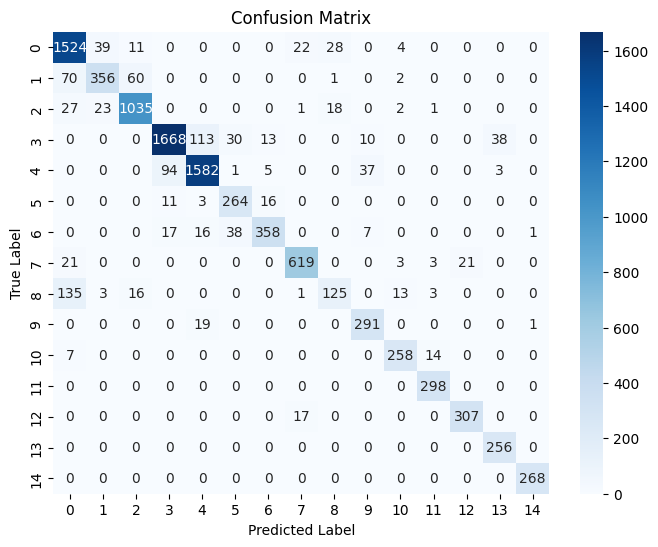

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 15)                  │           3,855 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 65,839 (257.19 KB)

 Trainable params: 21,775 (85.06 KB)

 Non-trainable params: 512 (2.00 KB)

 Optimizer params: 43,552 (170.13 KB)

Model saved to mlp_model.h5


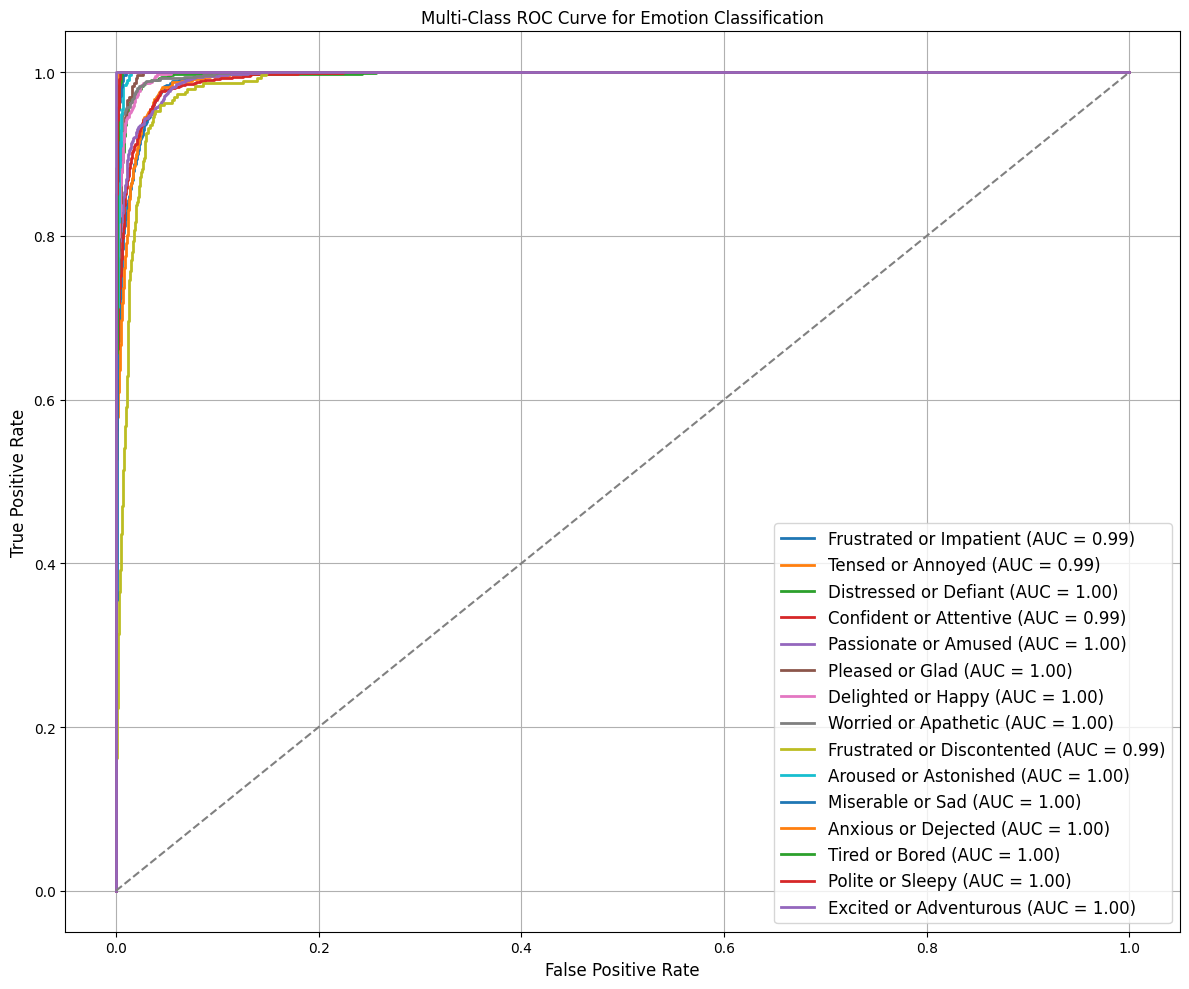

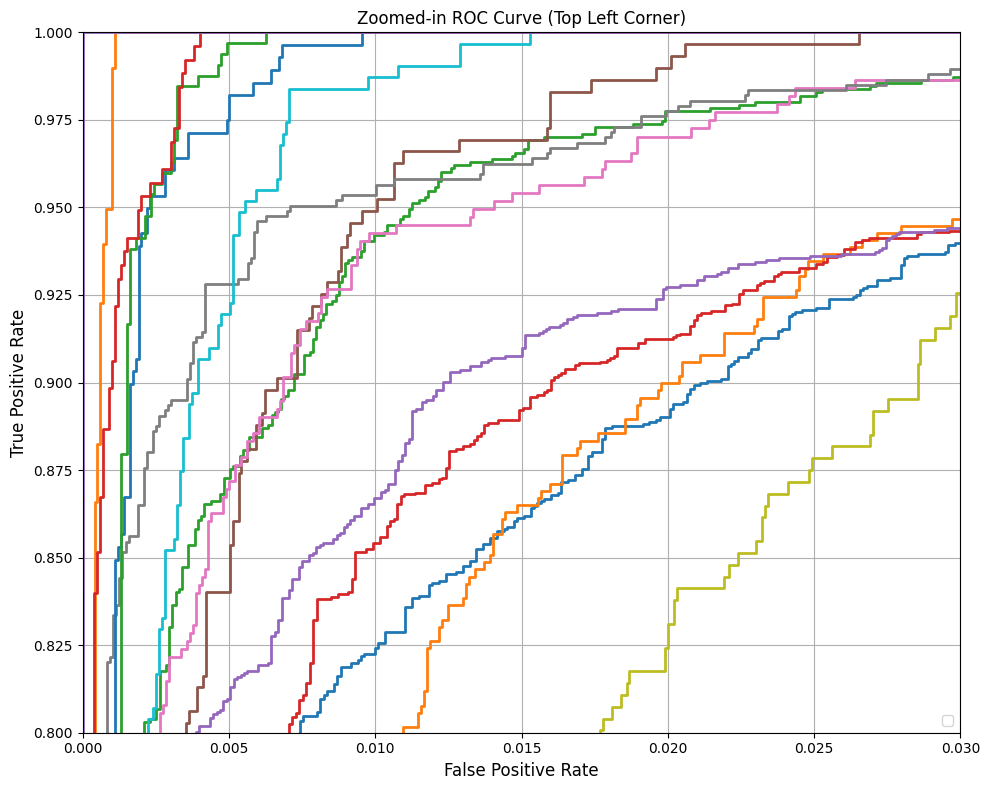

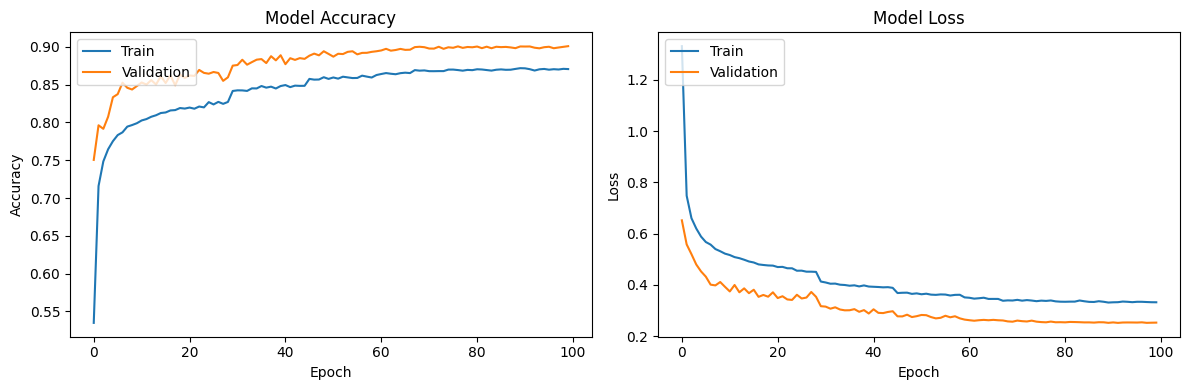

In [13]:
# Reduce learning rate on plateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=0)

def build_mlp_model(input_shape, num_classes):
    model = Sequential()
    
    # First fully connected layer with 128 units
    model.add(Dense(64, input_shape=input_shape, activation='relu'))
    model.add(Dropout(0.2))
    
    # Second fully connected layer with 64 units
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    # Output layer
    model.add(Dense(num_classes, activation='softmax'))
    
    # Adam optimizer with custom learning rate
    optimizer = Adam(learning_rate=0.000924)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Load data (assuming 'df' is already loaded as your DataFrame)
X = df.drop(columns=['Emotion'])
y = df['Emotion']

# Splitting data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

input_shape = (X_train.shape[1],)  # Input shape for MLP (one-dimensional input vector)
num_classes = len(np.unique(y))    # Number of unique classes in the target variable

# Build and train MLP model
mlp_model = build_mlp_model(input_shape, num_classes)
history = mlp_model.fit(
    X_train, y_train,
    epochs=100, batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[reduce_lr],
    verbose=1
)

# Predictions on test data
predictions = mlp_model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Create DataFrame for predictions
pred_df = X_test.copy()
pred_df['Emotion'] = predicted_labels
pred_df['Emotion_Type'] = pred_df['Emotion'].apply(lambda x: 1.0 if x in positive_emotion_numbers else 0.0)
y_pred = pred_df['Emotion'].values
pred_df.drop(columns=['Emotion'], inplace=True)

test_df = X_test.copy()

# Compute evaluation metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels, average='weighted')
recall = recall_score(y_test, predicted_labels, average='weighted')

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Classification Report
class_report = classification_report(y_test, predicted_labels)
print("Classification Report:")
print(class_report)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
conf_matrix = tf.math.confusion_matrix(y_test, predicted_labels).numpy()
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


mlp_model.summary()
model_filename = 'mlp_model.h5'
mlp_model.save(model_filename)
print(f"Model saved to {model_filename}")




# --- ROC CURVE FOR MULTI-CLASS TEST DATA WITH CLASS LABELS ---
n_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Get the emotion labels from your dictionary
emotion_labels = {
    0: 'Frustrated or Impatient',
    1: 'Tensed or Annoyed',
    2: 'Distressed or Defiant',
    3: 'Confident or Attentive',
    4: 'Passionate or Amused',
    5: 'Pleased or Glad',
    6: 'Delighted or Happy',
    7: 'Worried or Apathetic',
    8: 'Frustrated or Discontented',
    9: 'Aroused or Astonished',
    10: 'Miserable or Sad',
    11: 'Anxious or Dejected',
    12: 'Tired or Bored',
    13: 'Polite or Sleepy',
    14: 'Excited or Adventurous'
}

plt.figure(figsize=(12, 10))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], predictions[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{emotion_labels[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Multi-Class ROC Curve for Emotion Classification')
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
# Adjust figure layout to ensure legend fits properly
plt.tight_layout()
plt.savefig("multi_class_roc_curve.png", dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], predictions[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Custom x and y limits for zoomed-in view
plt.xlim([0.0, 0.03])  # Zooming into the top-left region
plt.ylim([0.8, 1.0])   # Focusing on high TPR values

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Zoomed-in ROC Curve (Top Left Corner)')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.savefig("zoomed_multi_class_roc_curve.png", dpi=300, bbox_inches='tight')
plt.show()

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.savefig("training_history.png", dpi=300, bbox_inches='tight')

plt.show()

# GRU

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.9478
Precision: 0.9494
Recall: 0.9478
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1628
           1       0.89      0.90      0.90       489
           2       0.96      0.96      0.96      1107
           3       0.96      0.96      0.96      1872
           4       0.96      0.95      0.96      1722
           5       0.93      0.90      0.92       294
           6       0.94      0.96      0.95       437
           7       0.98      0.91      0.95       667
           8       0.73      0.87      0.80       296
           9       0.93      0.98      0.96       311
          10       0.96      1.00      0.98       279
          11       0.99      1.00      0.99       298
          12       0.90      1.00      0.95       324
          13       0.95      1.00      0.98       256
          14       1.00      1.00      1.00       268

    accuracy        

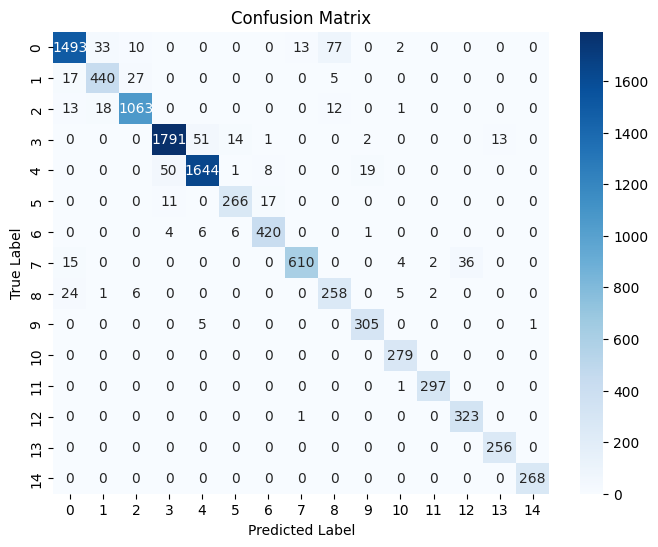

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 64)                  │          12,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 15)                  │           3,855 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 102,127 (398.94 KB)

 Trainable params: 33,871 (132.31 KB)

 Non-trainable params: 512 (2.00 KB)

 Optimizer params: 67,744 (264.63 KB)

Model saved to gru_model.h5


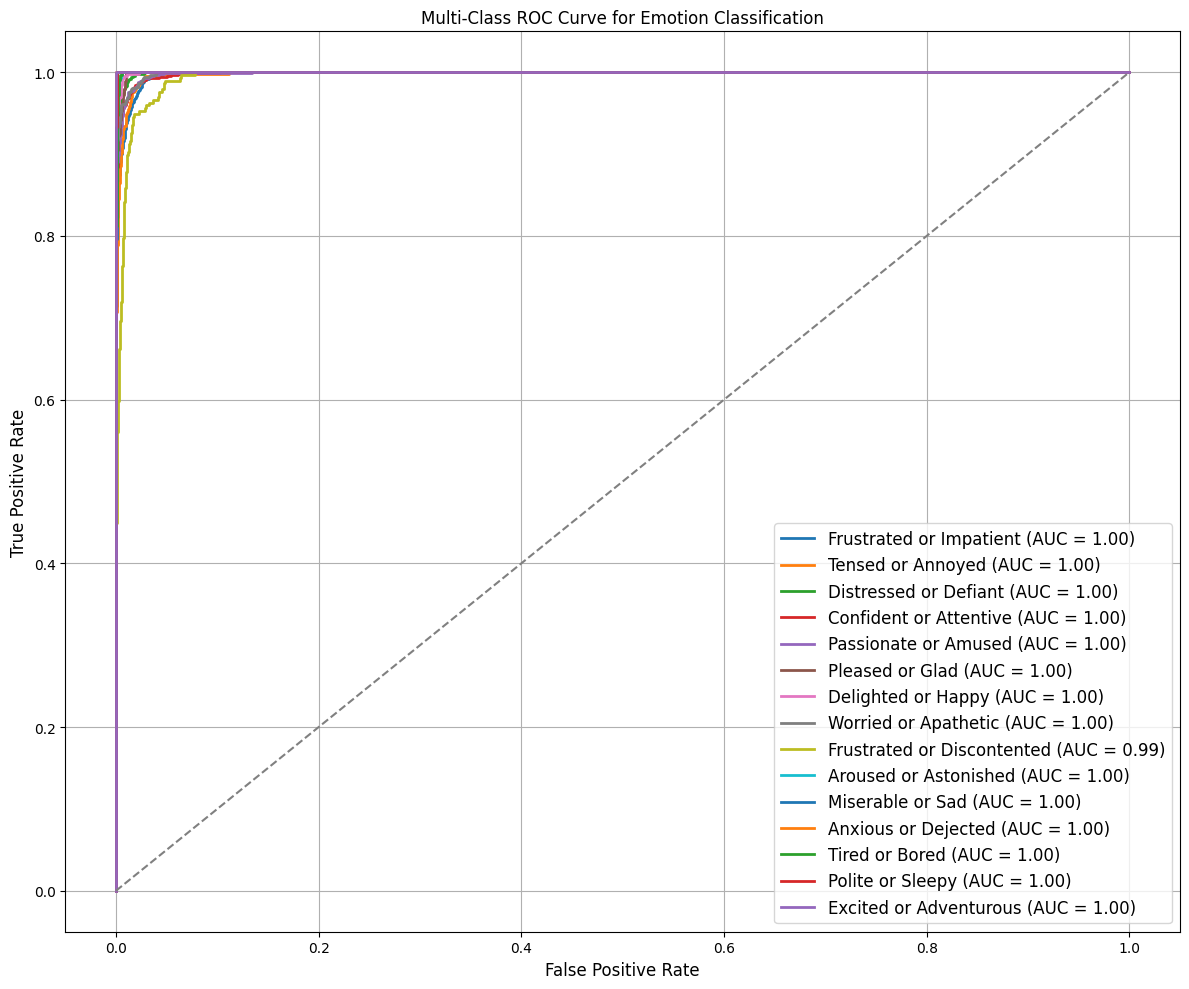

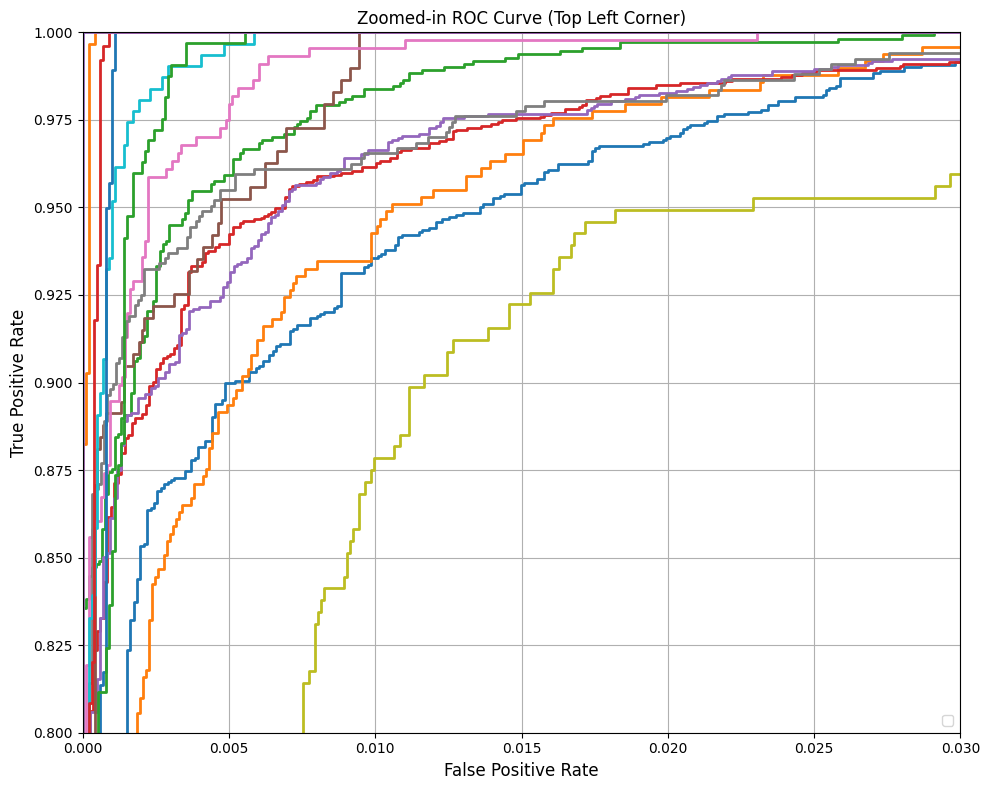

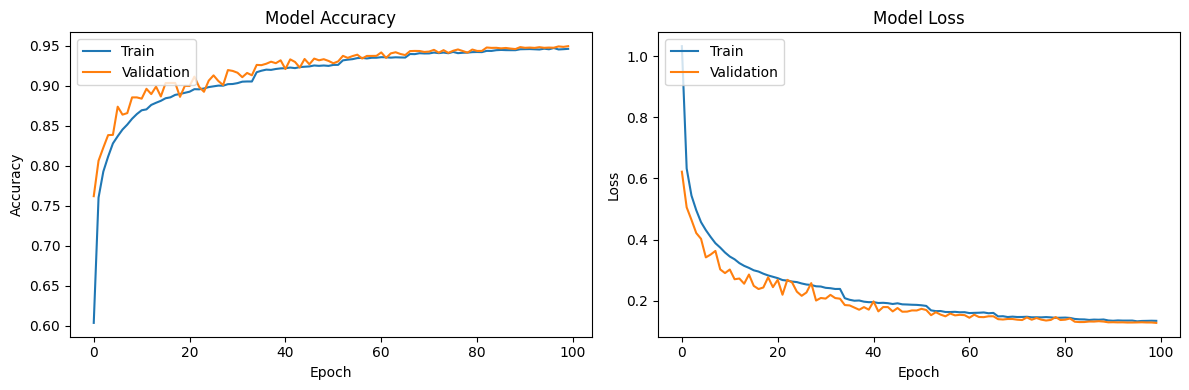

In [14]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=0)

def build_gru_model(input_shape, num_classes):
    model = Sequential()
    
    # Single GRU Layer with 128 units
    model.add(GRU(64, input_shape=input_shape))
    model.add(Dropout(0.2))
    
    # Fully connected layers
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    # Output layer
    model.add(Dense(num_classes, activation='softmax'))
    
    optimizer = Adam(learning_rate=0.000924)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Load data
X = df.drop(columns=['Emotion'])
y = df['Emotion']

# Splitting Data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42) 
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  

input_shape = (X_train.shape[1], 1)
num_classes = len(np.unique(y))

# Build and train GRU model
gru_model = build_gru_model(input_shape, num_classes)
history = gru_model.fit(
    X_train, y_train, 
    epochs=100, batch_size=32, 
    validation_data=(X_val, y_val), 
    callbacks=[reduce_lr],
    verbose=0
)

# Predictions on test data
predictions = gru_model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

pred_df = X_test.copy()
pred_df['Emotion'] = predicted_labels
pred_df['Emotion_Type'] = pred_df['Emotion'].apply(lambda x: 1.0 if x in positive_emotion_numbers else 0.0)
y_pred = pred_df['Emotion'].values
pred_df.drop(columns=['Emotion'], inplace=True)

test_df = X_test.copy()

# Compute evaluation metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels, average='weighted')
recall = recall_score(y_test, predicted_labels, average='weighted')

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Classification Report
class_report = classification_report(y_test, predicted_labels)
print("Classification Report:")
print(class_report)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
conf_matrix = tf.math.confusion_matrix(y_test, predicted_labels).numpy()
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


gru_model.summary()
model_filename = 'gru_model.h5'
gru_model.save(model_filename)
print(f"Model saved to {model_filename}")



# --- ROC CURVE FOR MULTI-CLASS TEST DATA WITH CLASS LABELS ---
n_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Get the emotion labels from your dictionary
emotion_labels = {
    0: 'Frustrated or Impatient',
    1: 'Tensed or Annoyed',
    2: 'Distressed or Defiant',
    3: 'Confident or Attentive',
    4: 'Passionate or Amused',
    5: 'Pleased or Glad',
    6: 'Delighted or Happy',
    7: 'Worried or Apathetic',
    8: 'Frustrated or Discontented',
    9: 'Aroused or Astonished',
    10: 'Miserable or Sad',
    11: 'Anxious or Dejected',
    12: 'Tired or Bored',
    13: 'Polite or Sleepy',
    14: 'Excited or Adventurous'
}

plt.figure(figsize=(12, 10))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], predictions[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{emotion_labels[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Multi-Class ROC Curve for Emotion Classification')
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
# Adjust figure layout to ensure legend fits properly
plt.tight_layout()
plt.savefig("multi_class_roc_curve.png", dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], predictions[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Custom x and y limits for zoomed-in view
plt.xlim([0.0, 0.03])  # Zooming into the top-left region
plt.ylim([0.8, 1.0])   # Focusing on high TPR values

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Zoomed-in ROC Curve (Top Left Corner)')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.savefig("zoomed_multi_class_roc_curve.png", dpi=300, bbox_inches='tight')
plt.show()

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.savefig("training_history.png", dpi=300, bbox_inches='tight')

plt.show()

# LSTM

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2562/2562 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.4451 - loss: 1.5432 - val_accuracy: 0.7053 - val_loss: 0.7432 - learning_rate: 8.5700e-04
Epoch 2/100
2562/2562 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7175 - loss: 0.7330 - val_accuracy: 0.7717 - val_loss: 0.5839 - learning_rate: 8.5700e-04
Epoch 3/100
2562/2562 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7599 - loss: 0.6259 - val_accuracy: 0.8198 - val_loss: 0.4760 - learning_rate: 8.5700e-04
Epoch 4/100
2562/2562 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7861 - loss: 0.5631 - val_accuracy: 0.8344 - val_loss: 0.4240 - learning_rate: 8.5700e-04
Epoch 5/100
2562/2562 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8012 - loss: 0.5193 - val_accuracy: 0.8414 - val_loss: 0.4071 - learning_rate: 8.5700e-04
Epoch 6/100
2562/2562 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8136 - loss: 0.4830 - val_accuracy: 0.8453 - val_loss: 0.4042 - learning_rate: 8.5700e-04
Epoch 7/100
2562/2562 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/s

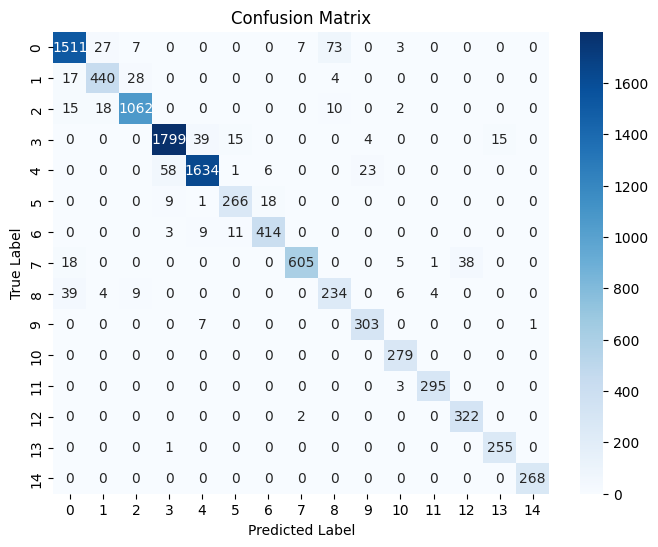

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 15)                  │           3,855 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 114,223 (446.19 KB)

 Trainable params: 37,903 (148.06 KB)

 Non-trainable params: 512 (2.00 KB)

 Optimizer params: 75,808 (296.13 KB)

Model saved to lstm_model.h5


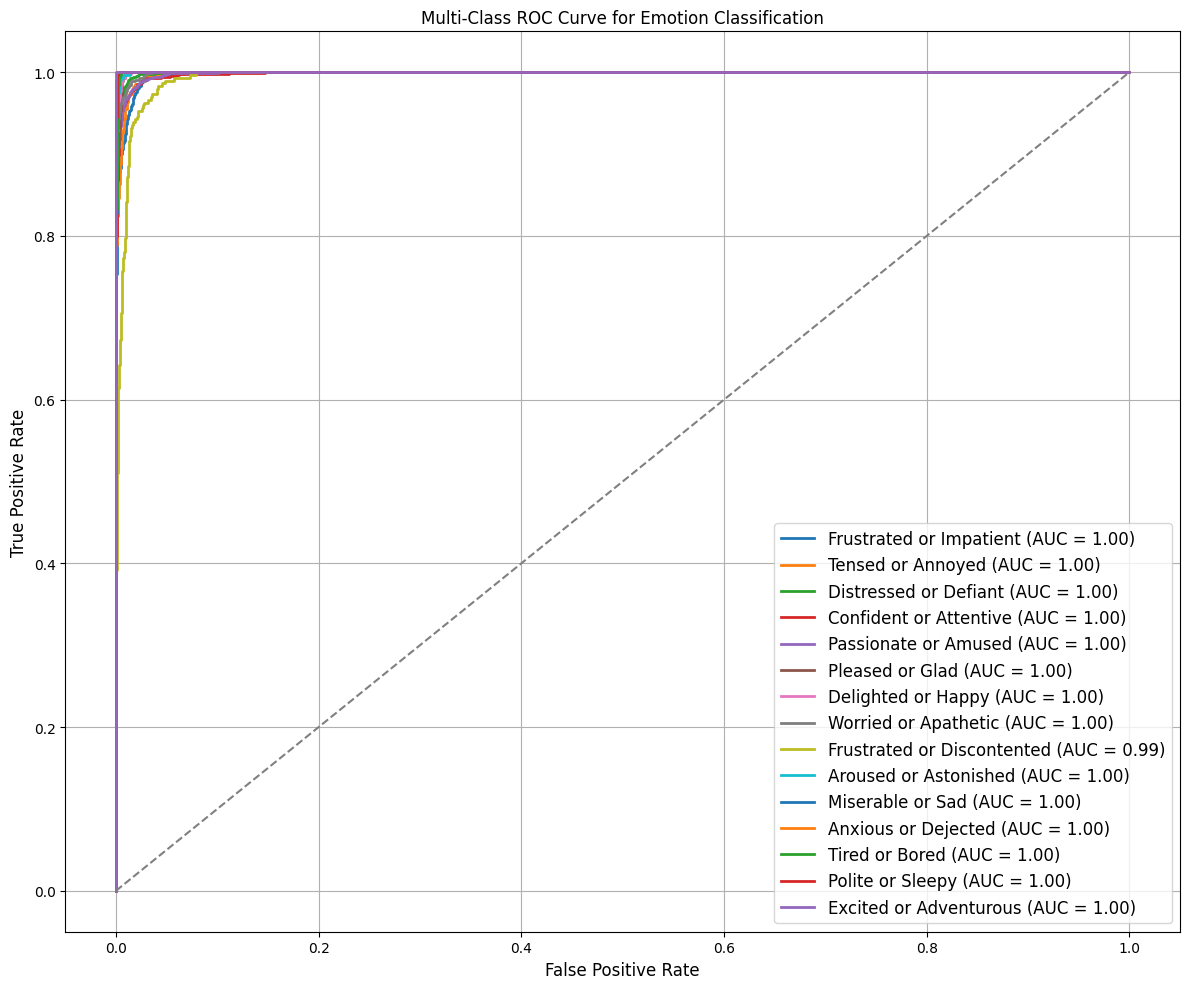

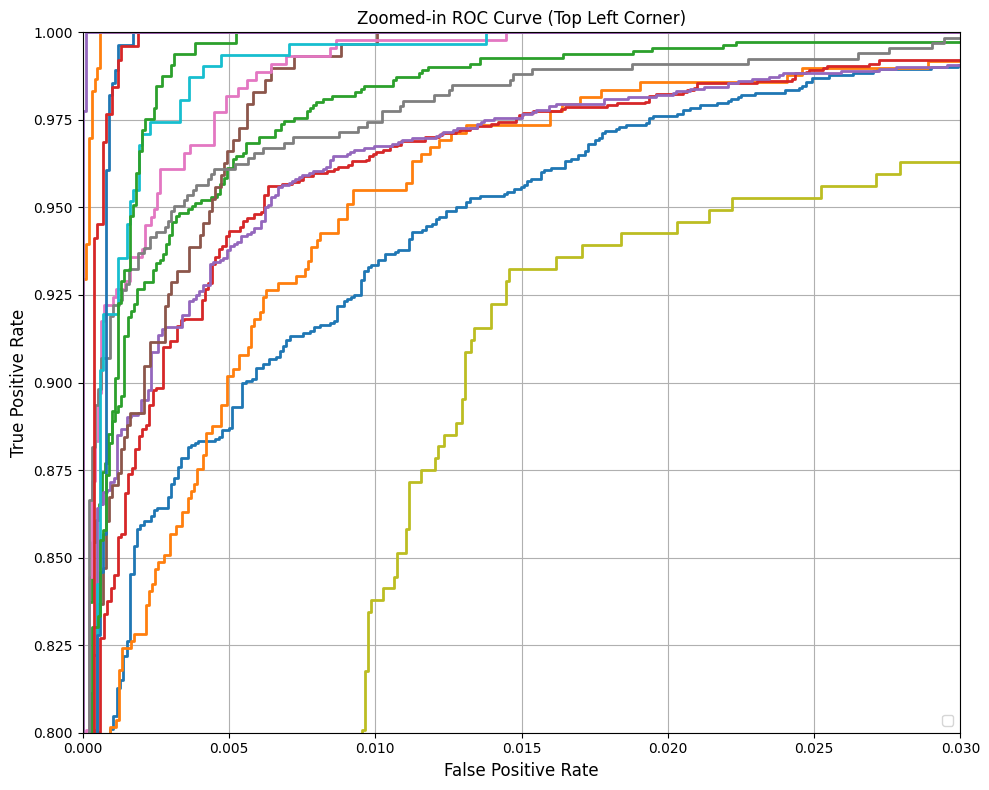

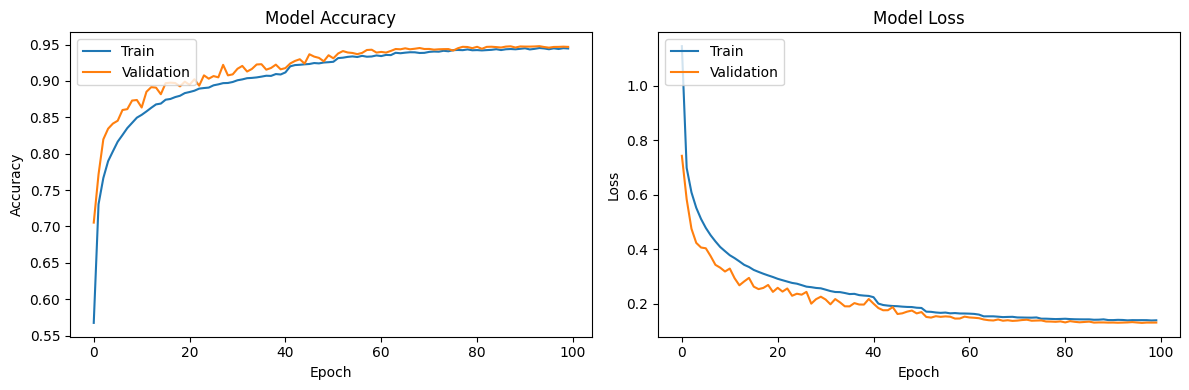

In [15]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

def build_lstm_model(input_shape, num_classes):
    model = Sequential()
    
    model.add(LSTM(64, input_shape=input_shape))
    model.add(Dropout(0.2))
    
    # Fully connected layers
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    # Output layer
    model.add(Dense(num_classes, activation='softmax'))
    
    optimizer = Adam(learning_rate=0.000857)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Load data
X = df.drop(columns=['Emotion'])
y = df['Emotion']

# Splitting Data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42) 
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  

input_shape = (X_train.shape[1], 1)
num_classes = len(np.unique(y))

# Build and train LSTM model
lstm_model = build_lstm_model(input_shape, num_classes)
history = lstm_model.fit(
    X_train, y_train, 
    epochs=100, batch_size=32, 
    validation_data=(X_val, y_val), 
    callbacks=[reduce_lr],
    verbose=1
)

# Predictions on test data
predictions = lstm_model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

pred_df = X_test.copy()
pred_df['Emotion'] = predicted_labels
pred_df['Emotion_Type'] = pred_df['Emotion'].apply(lambda x: 1.0 if x in positive_emotion_numbers else 0.0)
y_pred = pred_df['Emotion'].values
pred_df.drop(columns=['Emotion'], inplace=True)

test_df = X_test.copy()

# Compute evaluation metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels, average='weighted')
recall = recall_score(y_test, predicted_labels, average='weighted')

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Classification Report
class_report = classification_report(y_test, predicted_labels)
print("Classification Report:")
print(class_report)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
conf_matrix = tf.math.confusion_matrix(y_test, predicted_labels).numpy()
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

lstm_model.summary()
model_filename = 'lstm_model.h5'
lstm_model.save(model_filename)
print(f"Model saved to {model_filename}")



# --- ROC CURVE FOR MULTI-CLASS TEST DATA WITH CLASS LABELS ---
n_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Get the emotion labels from your dictionary
emotion_labels = {
    0: 'Frustrated or Impatient',
    1: 'Tensed or Annoyed',
    2: 'Distressed or Defiant',
    3: 'Confident or Attentive',
    4: 'Passionate or Amused',
    5: 'Pleased or Glad',
    6: 'Delighted or Happy',
    7: 'Worried or Apathetic',
    8: 'Frustrated or Discontented',
    9: 'Aroused or Astonished',
    10: 'Miserable or Sad',
    11: 'Anxious or Dejected',
    12: 'Tired or Bored',
    13: 'Polite or Sleepy',
    14: 'Excited or Adventurous'
}

plt.figure(figsize=(12, 10))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], predictions[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{emotion_labels[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Multi-Class ROC Curve for Emotion Classification')
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
# Adjust figure layout to ensure legend fits properly
plt.tight_layout()
plt.savefig("multi_class_roc_curve.png", dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], predictions[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Custom x and y limits for zoomed-in view
plt.xlim([0.0, 0.03])  # Zooming into the top-left region
plt.ylim([0.8, 1.0])   # Focusing on high TPR values

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Zoomed-in ROC Curve (Top Left Corner)')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.savefig("zoomed_multi_class_roc_curve.png", dpi=300, bbox_inches='tight')
plt.show()

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.savefig("training_history.png", dpi=300, bbox_inches='tight')

plt.show()

# RNN

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.9378
Precision: 0.9387
Recall: 0.9378
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1628
           1       0.88      0.83      0.86       489
           2       0.94      0.95      0.95      1107
           3       0.96      0.94      0.95      1872
           4       0.96      0.95      0.95      1722
           5       0.88      0.92      0.90       294
           6       0.94      0.93      0.94       437
           7       0.97      0.92      0.95       667
           8       0.72      0.80      0.76       296
           9       0.93      0.97      0.95       311
          10       0.94      0.99      0.96       279
          11       0.97      0.99      0.98       298
          12       0.92      0.97      0.94       324
          13       0.94      1.00      0.97       256
          14       1.00      1.00      1.00       268

    accuracy        

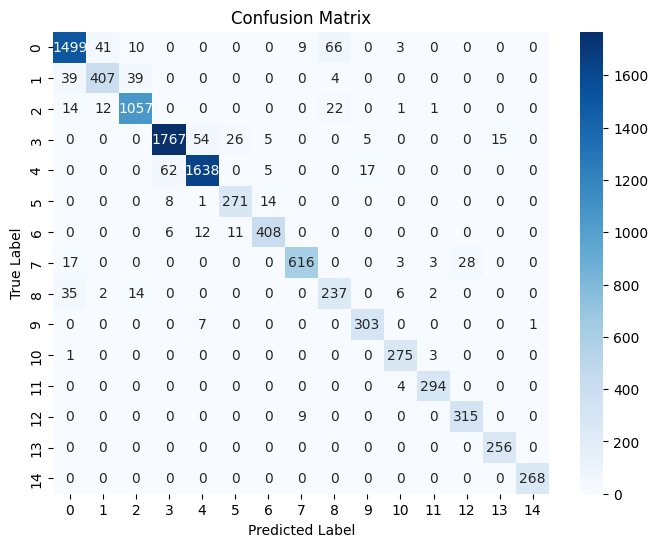

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 64)                  │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 15)                  │           3,855 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 76,207 (297.69 KB)

 Trainable params: 25,231 (98.56 KB)

 Non-trainable params: 512 (2.00 KB)

 Optimizer params: 50,464 (197.13 KB)

Model saved to rnn_model.h5


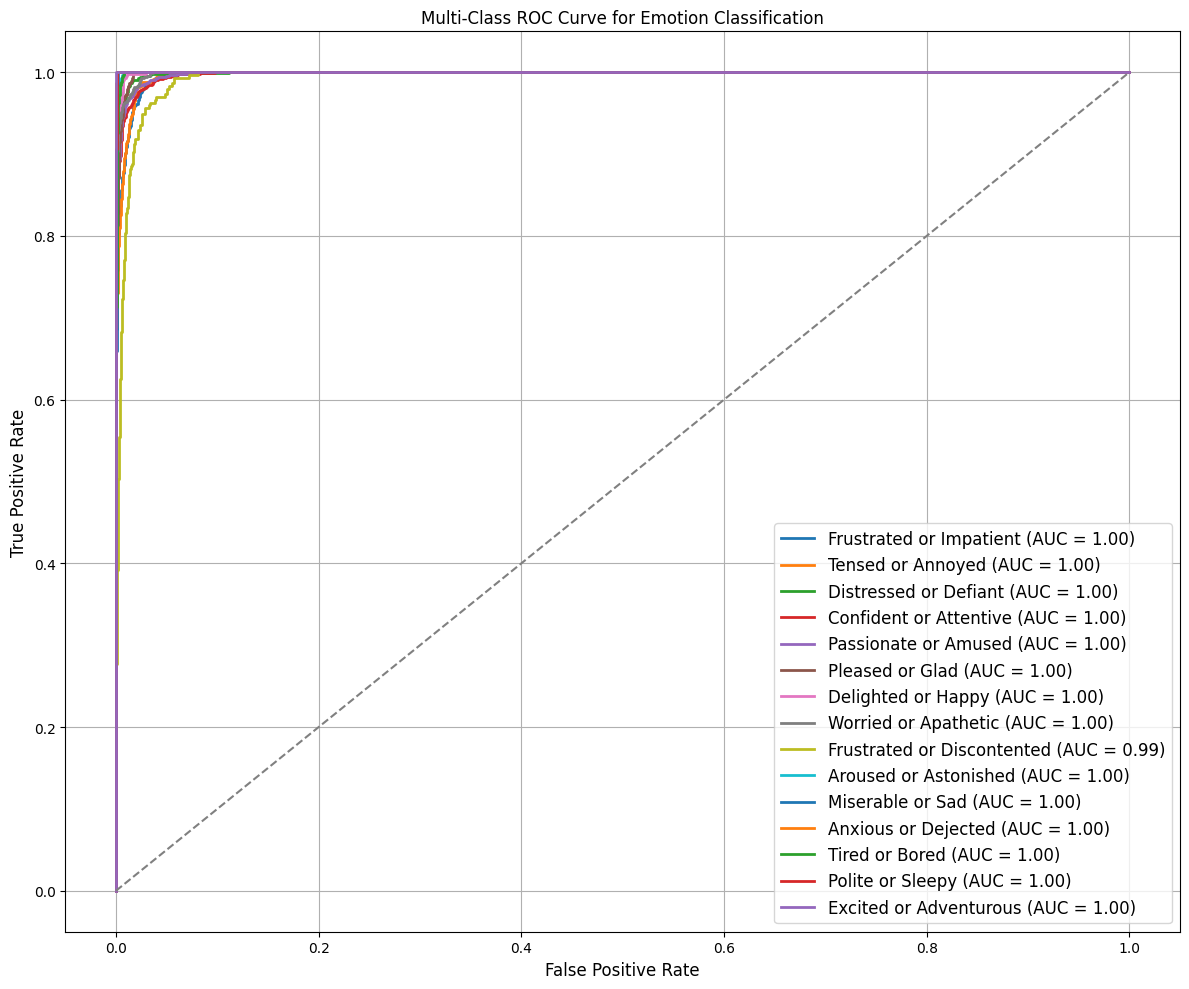

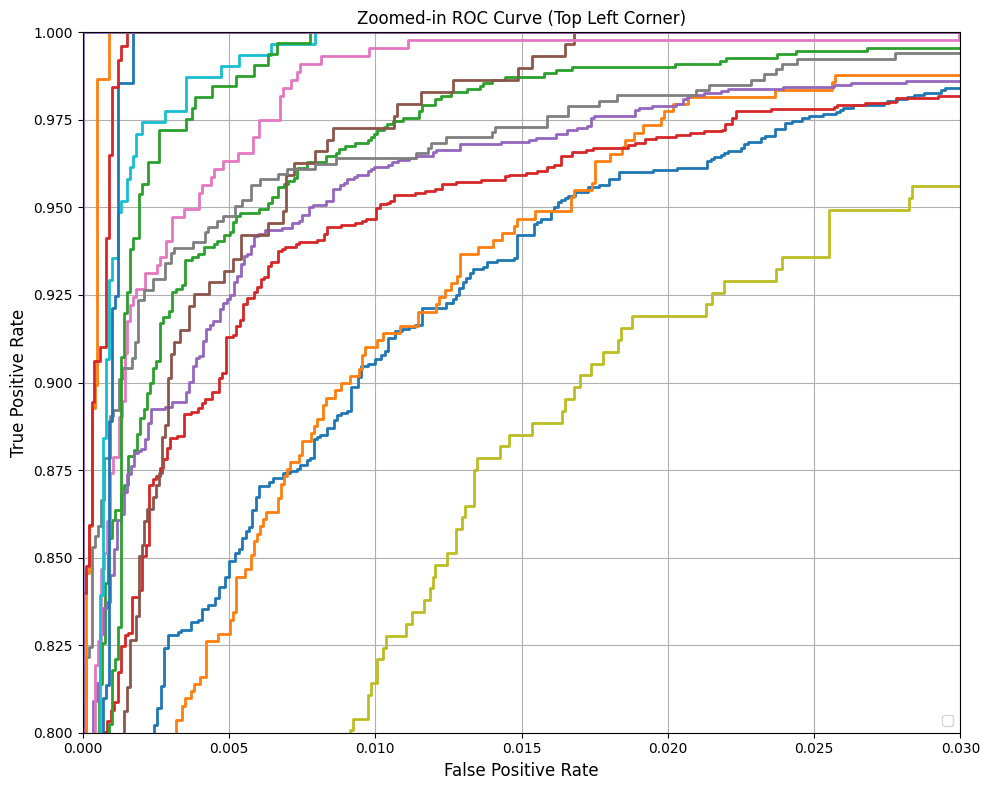

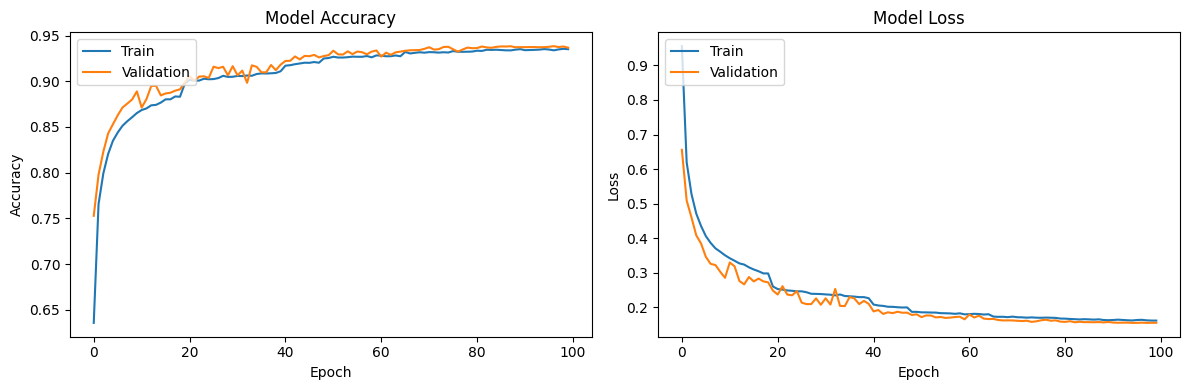

In [16]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=0)

def build_rnn_model(input_shape, num_classes):
    model = Sequential()
    
    # RNN Layer with 128 units
    model.add(SimpleRNN(64, input_shape=input_shape))
    model.add(Dropout(0.1))
    
    # Fully connected layers
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))
    
    # Output layer
    model.add(Dense(num_classes, activation='softmax'))
    
    optimizer = Adam(learning_rate=0.000955)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Load data
X = df.drop(columns=['Emotion'])
y = df['Emotion']

# Splitting Data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42) 
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  

input_shape = (X_train.shape[1], 1)
num_classes = len(np.unique(y))

# Build and train RNN model
rnn_model = build_rnn_model(input_shape, num_classes)
history = rnn_model.fit(
    X_train, y_train, 
    epochs=100, batch_size=32, 
    validation_data=(X_val, y_val), 
    callbacks=[reduce_lr],
    verbose=0
)

# Predictions on test data
predictions = rnn_model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

pred_df = X_test.copy()
pred_df['Emotion'] = predicted_labels
pred_df['Emotion_Type'] = pred_df['Emotion'].apply(lambda x: 1.0 if x in positive_emotion_numbers else 0.0)
y_pred = pred_df['Emotion'].values
pred_df.drop(columns=['Emotion'], inplace=True)

test_df = X_test.copy()

# Compute evaluation metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels, average='weighted')
recall = recall_score(y_test, predicted_labels, average='weighted')

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Classification Report
class_report = classification_report(y_test, predicted_labels)
print("Classification Report:")
print(class_report)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
conf_matrix = tf.math.confusion_matrix(y_test, predicted_labels).numpy()
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

rnn_model.summary()
model_filename = 'rnn_model.h5'
rnn_model.save(model_filename)
print(f"Model saved to {model_filename}")


# --- ROC CURVE FOR MULTI-CLASS TEST DATA WITH CLASS LABELS ---
n_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Get the emotion labels from your dictionary
emotion_labels = {
    0: 'Frustrated or Impatient',
    1: 'Tensed or Annoyed',
    2: 'Distressed or Defiant',
    3: 'Confident or Attentive',
    4: 'Passionate or Amused',
    5: 'Pleased or Glad',
    6: 'Delighted or Happy',
    7: 'Worried or Apathetic',
    8: 'Frustrated or Discontented',
    9: 'Aroused or Astonished',
    10: 'Miserable or Sad',
    11: 'Anxious or Dejected',
    12: 'Tired or Bored',
    13: 'Polite or Sleepy',
    14: 'Excited or Adventurous'
}

plt.figure(figsize=(12, 10))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], predictions[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{emotion_labels[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Multi-Class ROC Curve for Emotion Classification')
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
# Adjust figure layout to ensure legend fits properly
plt.tight_layout()
plt.savefig("multi_class_roc_curve.png", dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], predictions[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Custom x and y limits for zoomed-in view
plt.xlim([0.0, 0.03])  # Zooming into the top-left region
plt.ylim([0.8, 1.0])   # Focusing on high TPR values

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Zoomed-in ROC Curve (Top Left Corner)')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.savefig("zoomed_multi_class_roc_curve.png", dpi=300, bbox_inches='tight')
plt.show()

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.savefig("training_history.png", dpi=300, bbox_inches='tight')

plt.show()

# CNN

321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.9012
Precision: 0.9014
Recall: 0.9012
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1628
           1       0.89      0.69      0.78       489
           2       0.94      0.91      0.93      1107
           3       0.91      0.93      0.92      1872
           4       0.93      0.92      0.93      1722
           5       0.84      0.89      0.87       294
           6       0.97      0.83      0.90       437
           7       0.94      0.92      0.93       667
           8       0.74      0.32      0.45       296
           9       0.88      0.88      0.88       311
          10       0.90      0.91      0.90       279
          11       0.93      1.00      0.96       298
          12       0.94      0.94      0.94       324
          13       0.89      0.98      0.93       256
          14       0.99      1.00      1.00       268

    accuracy        

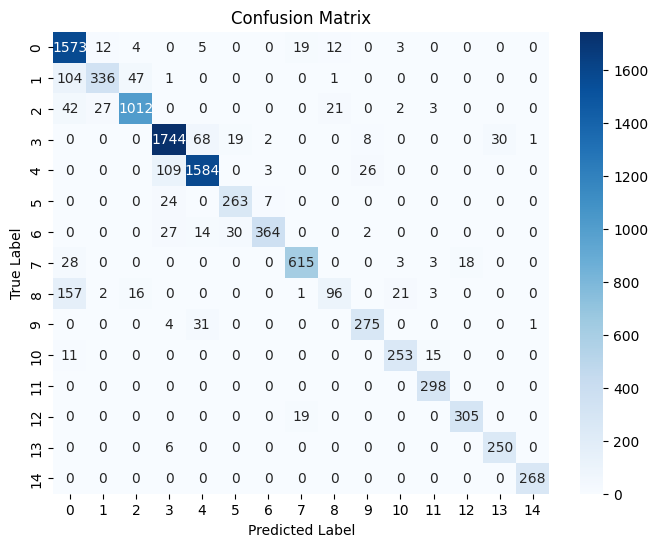

Model: "functional_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 11, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 11, 64)              │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 11, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 5, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 320)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 320)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │          82,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 15)                  │           3,855 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 261,807 (1022.69 KB)

 Trainable params: 87,055 (340.06 KB)

 Non-trainable params: 640 (2.50 KB)

 Optimizer params: 174,112 (680.13 KB)

Model saved to cnn_model.h5


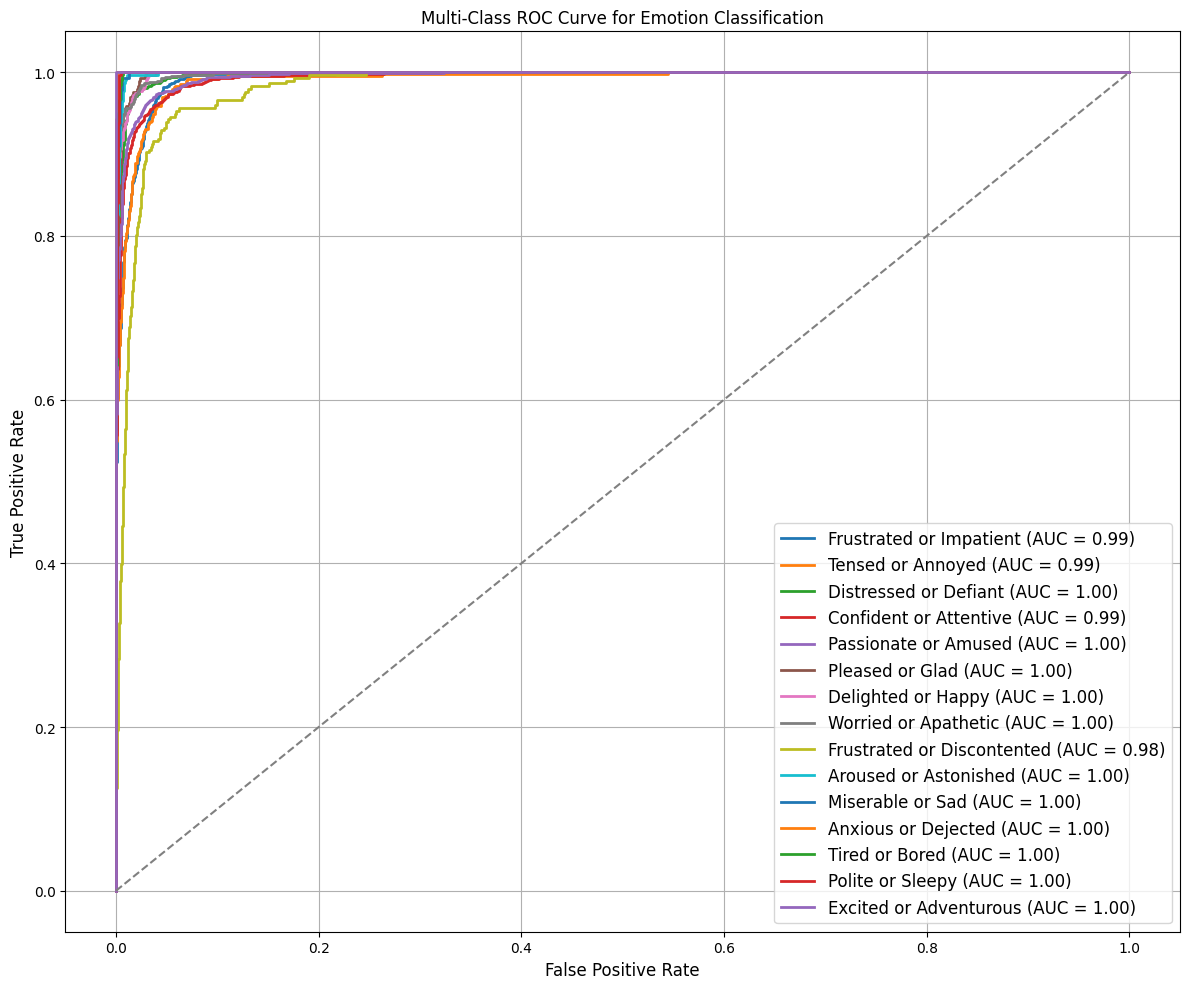

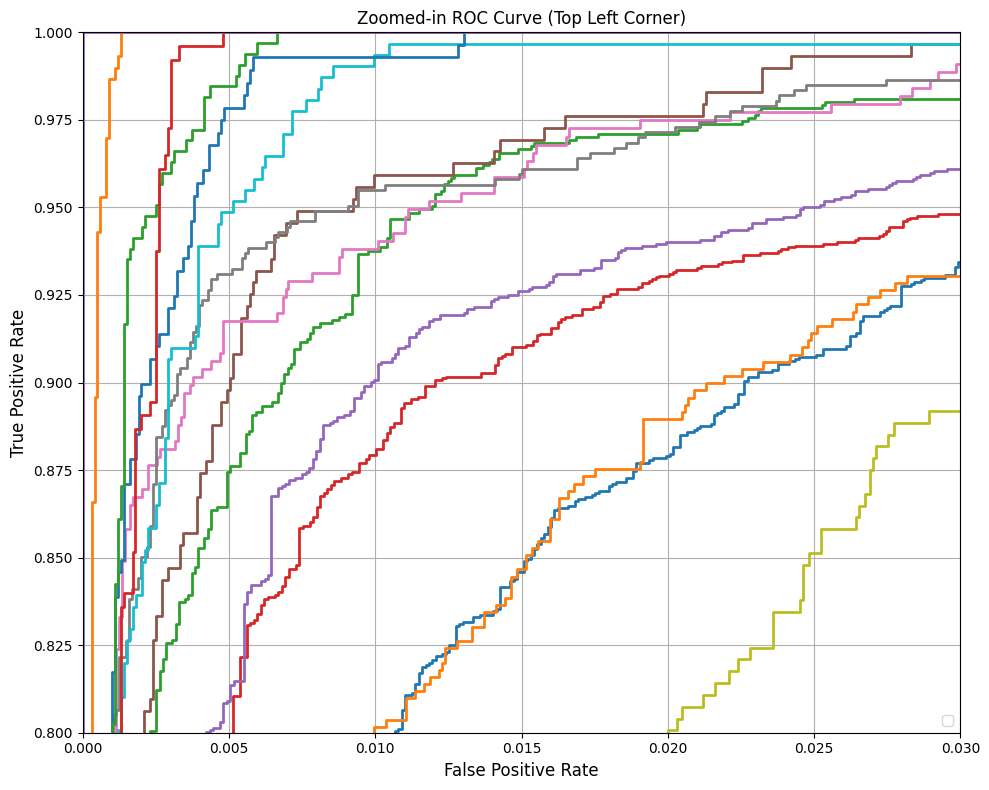

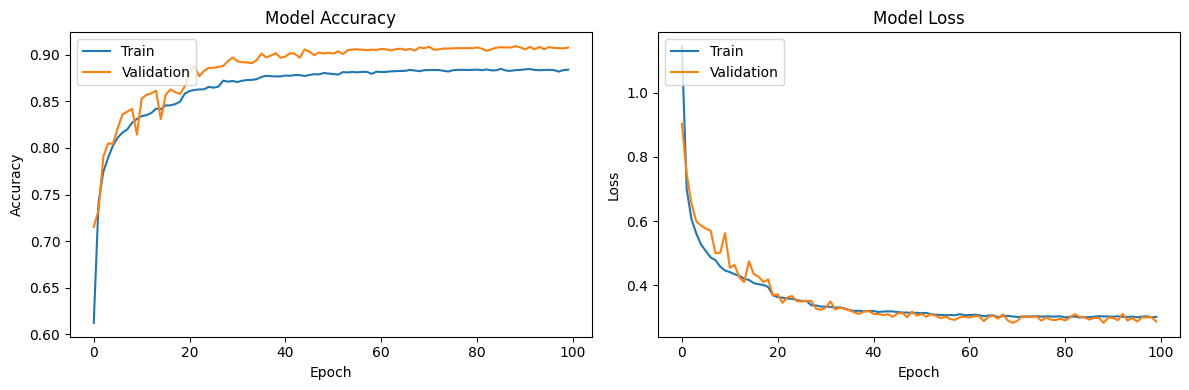

In [17]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=0)

def build_cnn_model(input_shape, num_classes):
    """
    Build a CNN model with fixed hyperparameters (without tuning)
    """
    inputs = Input(shape=input_shape)
    
    # First Conv1D layer
    x = Conv1D(
        filters=64,  # Fixed filter count
        kernel_size=7,  # Fixed kernel size
        activation='relu',
        padding='same'
    )(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)

    x = Conv1D(
        filters=64,  # Fixed filter count
        kernel_size=5,  # Fixed kernel size
        activation='relu',
        padding='same'
    )(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)
    
    # Flatten and Dense layers
    x = Flatten()(x)
    x = Dropout(0.1)(x)  # Fixed dropout value
    
    x = Dense(256, activation='relu')(x)  # Fixed dense layer size
    x = BatchNormalization()(x)
    x = Dropout(0.1)(x)
    
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs)
    
    # Fixed learning rate
    optimizer = Adam(learning_rate=0.000497)
    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model


# Load data
X = df.drop(columns=['Emotion'])
y = df['Emotion']

# Splitting Data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42) 
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  

# Reshape input for CNN
X_train_cnn = np.expand_dims(X_train, axis=-1)
X_val_cnn = np.expand_dims(X_val, axis=-1)
X_test_cnn = np.expand_dims(X_test, axis=-1)

input_shape = (X_train_cnn.shape[1], 1)
num_classes = len(np.unique(y))

# Build and train CNN model
cnn_model = build_cnn_model(input_shape, num_classes)
history = cnn_model.fit(
    X_train_cnn, y_train, 
    epochs=100, batch_size=32, 
    validation_data=(X_val_cnn, y_val), 
    callbacks=[
        reduce_lr
    ],
    verbose=0
)

# Predictions on test data
predictions = cnn_model.predict(X_test_cnn)
predicted_labels = np.argmax(predictions, axis=1)

pred_df = X_test.copy()
pred_df = pd.DataFrame(pred_df, columns=df.drop(columns=['Emotion']).columns)
pred_df['Emotion'] = predicted_labels
pred_df['Emotion_Type'] = pred_df['Emotion'].apply(lambda x: 1.0 if x in positive_emotion_numbers else 0.0)
pred_df.drop(columns=['Emotion'], inplace=True)

test_df = X_test.copy()
test_df['Emotion_Type'] = (test_df['Emotion_Type'] == 1).astype(float)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels, average='weighted')
recall = recall_score(y_test, predicted_labels, average='weighted')

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Classification Report
class_report = classification_report(y_test, predicted_labels)
print("Classification Report:")
print(class_report)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
conf_matrix = tf.math.confusion_matrix(y_test, predicted_labels).numpy()
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

cnn_model.summary()
model_filename = 'cnn_model.h5'
cnn_model.save(model_filename)
print(f"Model saved to {model_filename}")



# --- ROC CURVE FOR MULTI-CLASS TEST DATA WITH CLASS LABELS ---
n_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Get the emotion labels from your dictionary
emotion_labels = {
    0: 'Frustrated or Impatient',
    1: 'Tensed or Annoyed',
    2: 'Distressed or Defiant',
    3: 'Confident or Attentive',
    4: 'Passionate or Amused',
    5: 'Pleased or Glad',
    6: 'Delighted or Happy',
    7: 'Worried or Apathetic',
    8: 'Frustrated or Discontented',
    9: 'Aroused or Astonished',
    10: 'Miserable or Sad',
    11: 'Anxious or Dejected',
    12: 'Tired or Bored',
    13: 'Polite or Sleepy',
    14: 'Excited or Adventurous'
}

plt.figure(figsize=(12, 10))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], predictions[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{emotion_labels[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Multi-Class ROC Curve for Emotion Classification')
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
# Adjust figure layout to ensure legend fits properly
plt.tight_layout()
plt.savefig("multi_class_roc_curve.png", dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], predictions[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Custom x and y limits for zoomed-in view
plt.xlim([0.0, 0.03])  # Zooming into the top-left region
plt.ylim([0.8, 1.0])   # Focusing on high TPR values

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Zoomed-in ROC Curve (Top Left Corner)')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.savefig("zoomed_multi_class_roc_curve.png", dpi=300, bbox_inches='tight')
plt.show()

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.savefig("training_history.png", dpi=300, bbox_inches='tight')

plt.show()